In [2]:
import pandas as pd
from konlpy.tag import Kkma
from tqdm import tqdm
from konlpy.tag import Okt
import numpy as np

In [3]:
file1='data/3부 여자 트레이닝 반바지 숏팬츠 돌핀팬츠 랍빠(236).csv'
file2='data/4부 헬스 반바지 스쿼트팬츠 트레이닝 바지(1157).csv'
file3='data/나이키 남자 레깅스 트레이닝 프로 타이즈 반바지 쇼츠(549).csv'
file4='data/나이키 아디다스 트레이닝복 긴바지 클럽 조거팬츠 삼선 남성트레이닝 운동복(917).csv'
file5='data/남녀공용 세미 와이드 트레이닝 팬츠 커플 통큰 츄리닝 바지 운동복 회색 빅사이즈 홈웨어(304).csv'
file6='data/남성 봄 겨울 츄리닝 트레이닝 바지 체육복 운동(540).csv'
file7='data/남성 쿨링 조거 트레이닝팬츠 여름용 겨울용(116).csv'
file8='data/남자 트레이닝 츄리닝 체육복 빅사이즈 조거 바지 M-5XL(853).csv'
file9='data/밀도 밴딩 트레이닝 헬스 운동 츄리닝 반바지 (빅사이즈, 남녀공용)(399).csv'
file10='data/알칸스 가을 남자 트레이닝바지 남성 츄리닝팬츠 운동복 37종(159).csv'

In [4]:
df1=pd.read_csv(file1, header=2)
df2=pd.read_csv(file2, header=2, encoding='utf-8')
df3=pd.read_csv(file3, header=2)
df4=pd.read_csv(file4, header=2)
df5=pd.read_csv(file5, header=2)
df6=pd.read_csv(file6, header=2)
df7=pd.read_csv(file7, header=2)
df8=pd.read_csv(file8, header=2)
df9=pd.read_csv(file9, header=2)
df10=pd.read_csv(file10, header=2)

# df1 = df1.dropna()
# df1['리뷰내용'] = df1['리뷰내용'].str.replace(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]+', '')
# df1



In [5]:
df1.head(3)

,작성자ID,리뷰내용,등록일,구매 옵션명,리뷰점수
0,bart*********,제가 살이 많이 쪄서 프리사이즈다 보니 안 맞을줄 알았는데 착용했더니 너무 편안하게...,2023-09-12T10:43:03.991+00:00,컬러: 레드,5
1,seul*****,원래 입던 반바지가 낡아서 새로 하나 사려던 중에 여기가 제일 나아보여서 여기서 구...,2023-09-14T12:40:54.687+00:00,컬러: 블랙,5
2,aqua*******,이뻐요 편하고 !! 가성비 너무 좋아요 또 구매하러 올게요,2023-10-01T13:37:29.539+00:00,컬러: 화이트,5


In [6]:
def make_df(df1):

    total = []
    for i in tqdm(df1['리뷰내용']):
        try:
            t = okt.normalize(i)
        except:
            continue
        try:
            t = kkma.pos(t)
        except:
            continue
        box = []
        for j in t:
            if j[1][:2] == 'NN' and len(j[0]) > 1:  # Include if length > 1
                box.append(j[0])
            elif j[1] in ['VV', 'VV'] and len(j[0]) > 1:  # Include if length > 1
                box.append(j[0] + '다')
        total.append(" ".join(box))
    
    combined_text = ' '.join(total)
    return combined_text


In [7]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
import re

okt=Okt()
kkma=Kkma()

def make_df(df1):

    total = []
    for i in tqdm(df1['리뷰내용']):
        # 이모지 빼기
        t = okt.normalize(i)
        t = " ".join(re.findall("[a-zA-Z가-힣0-9]+", t))  # 수정된 정규표현식
        t = kkma.pos(t)
    
        box = []
        for j in t:
            if j[1] in ['NNG', 'NNP', 'VA'] and len(j[0]) > 1:  # 명사와 형용사 선택하고 길이가 1 이상인 단어만 포함
                box.append(j[0])
        total.append(" ".join(box))
    
    total = ' '.join(total)
    return total

In [9]:
tDF = pd.DataFrame({'내용': [make_df(df1), make_df(df2), make_df(df3), make_df(df4), make_df(df5), make_df(df6), make_df(df7), make_df(df8), make_df(df9), make_df(df10)]})
tDF['판매건수'] = 236, 1157, 549, 917, 304, 540, 116, 853, 399, 159
tDF.to_csv('traingpants.csv')
tDF

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:21<00:00, 142.62it/s]


,내용,판매건수
0,제가 살이 프리 사이즈 착용 편안 하비 편하 착용 신축성 고무줄 밴딩 아프 돌핀 팬...,236
1,성비 부담 운동 세탁 걱정 안되 사이즈 평소 사이즈 추천 성비 부담 운동 세탁 걱정...,1157
2,편히 재질 운동 편하 편하 운동 허기 낚시 타이즈 착용 편하 바지 타이즈 사이즈 편...,549
3,브랜드 제품 기본 이상은 구매 허리 쫀쫀하 느낌 허리 탄력 편하 활동 부분 사람 겨...,917
4,택배 세탁 내일 생각 세탁 사진 구멍 마자 세탁 상품 교환 어렵 세탁 교환 환불 안...,304
5,운동 트레이닝 진짜 이미지 운동복 생각 친구 여자 친구 영화배우 나쁘 운동 하루 시...,540
6,전천후 밑단 거부 구매 진짜 가격 이정 퀄리티 여름 바지 종결 편하 구매 진짜 가격...,116
7,재질 보풀 아쉽 재질 가격 정도 성비 생각 부분 두껍 주머니 만족 오차범위 길이 수...,853
8,운동 일상 은근 괜찮 이번 바지 필요 반바지 반바지 두께 감이 정도 빠르 배송 이전...,399
9,네이비 주문 블랙 사이즈 주문 제품 수선 겨울 상품 이번 주문 가을 상품 진짜 최악...,159


In [10]:
sales_counts = [236, 1157, 549, 917, 304, 540, 116, 853, 399, 159]

# 중앙값 계산
median_sales = np.median(sales_counts)

# 라벨 추가
labels = [1 if count > median_sales else 0 for count in sales_counts]

tDF['라벨'] = labels

tDF

,내용,판매건수,라벨
0,제가 살이 프리 사이즈 착용 편안 하비 편하 착용 신축성 고무줄 밴딩 아프 돌핀 팬...,236,0
1,성비 부담 운동 세탁 걱정 안되 사이즈 평소 사이즈 추천 성비 부담 운동 세탁 걱정...,1157,1
2,편히 재질 운동 편하 편하 운동 허기 낚시 타이즈 착용 편하 바지 타이즈 사이즈 편...,549,1
3,브랜드 제품 기본 이상은 구매 허리 쫀쫀하 느낌 허리 탄력 편하 활동 부분 사람 겨...,917,1
4,택배 세탁 내일 생각 세탁 사진 구멍 마자 세탁 상품 교환 어렵 세탁 교환 환불 안...,304,0
5,운동 트레이닝 진짜 이미지 운동복 생각 친구 여자 친구 영화배우 나쁘 운동 하루 시...,540,1
6,전천후 밑단 거부 구매 진짜 가격 이정 퀄리티 여름 바지 종결 편하 구매 진짜 가격...,116,0
7,재질 보풀 아쉽 재질 가격 정도 성비 생각 부분 두껍 주머니 만족 오차범위 길이 수...,853,1
8,운동 일상 은근 괜찮 이번 바지 필요 반바지 반바지 두께 감이 정도 빠르 배송 이전...,399,0
9,네이비 주문 블랙 사이즈 주문 제품 수선 겨울 상품 이번 주문 가을 상품 진짜 최악...,159,0


In [11]:
score1 = df1['리뷰점수'].mean()
score2 = df2['리뷰점수'].mean()
score3 = df3['리뷰점수'].mean()
score4 = df4['리뷰점수'].mean()
score5 = df5['리뷰점수'].mean()
score6 = df6['리뷰점수'].mean()
score7 = df7['리뷰점수'].mean()
score8 = df8['리뷰점수'].mean()
score9 = df9['리뷰점수'].mean()
score10 = df10['리뷰점수'].mean()

tDF['리뷰평점'] = [score1, score2, score3, score4, score5,score6, score7, score8, score9, score10]
tDF

,내용,판매건수,라벨,리뷰평점
0,제가 살이 프리 사이즈 착용 편안 하비 편하 착용 신축성 고무줄 밴딩 아프 돌핀 팬...,236,0,4.757333
1,성비 부담 운동 세탁 걱정 안되 사이즈 평소 사이즈 추천 성비 부담 운동 세탁 걱정...,1157,1,4.877000
2,편히 재질 운동 편하 편하 운동 허기 낚시 타이즈 착용 편하 바지 타이즈 사이즈 편...,549,1,4.790667
3,브랜드 제품 기본 이상은 구매 허리 쫀쫀하 느낌 허리 탄력 편하 활동 부분 사람 겨...,917,1,4.612000
4,택배 세탁 내일 생각 세탁 사진 구멍 마자 세탁 상품 교환 어렵 세탁 교환 환불 안...,304,0,4.719333
5,운동 트레이닝 진짜 이미지 운동복 생각 친구 여자 친구 영화배우 나쁘 운동 하루 시...,540,1,4.789000
6,전천후 밑단 거부 구매 진짜 가격 이정 퀄리티 여름 바지 종결 편하 구매 진짜 가격...,116,0,4.818667
7,재질 보풀 아쉽 재질 가격 정도 성비 생각 부분 두껍 주머니 만족 오차범위 길이 수...,853,1,4.764000
8,운동 일상 은근 괜찮 이번 바지 필요 반바지 반바지 두께 감이 정도 빠르 배송 이전...,399,0,4.822000
9,네이비 주문 블랙 사이즈 주문 제품 수선 겨울 상품 이번 주문 가을 상품 진짜 최악...,159,0,4.377667


In [18]:
from collections import Counter

# 1에 해당하는 행들만 선택
high_rows = tDF[tDF['라벨'] == 1]
low_rows = tDF[tDF['라벨'] == 0]

# 모든 단어를 담을 리스트
high_words = []
low_words = []

# 각 행의 내용을 단어로 분리하여 리스트에 추가
for idx, row in high_rows.iterrows():
    words_in_row = row['내용'].split()  # 여기서는 공백 기준으로 단어를 분리
    high_words.extend(words_in_row)

# 단어 빈도를 계산
word_counts = Counter(high_words)

for idx, row in low_rows.iterrows():
    words_in_row = row['내용'].split()  # 여기서는 공백 기준으로 단어를 분리
    low_words.extend(words_in_row)
    
word_counts1 = Counter(low_words)

# 단어 빈도 출력
print("판매량 높은 단어 빈도:", len(word_counts))
print("판매량 낮은 단어 빈도:", len(word_counts1))
print("판매량 높은 단어 :", word_counts.most_common(50))
print("판매량 낮은 단어 :", word_counts1)


판매량 높은 단어 빈도: 2253
판매량 낮은 단어 빈도: 2325
판매량 높은 단어 : [('편하', 4122), ('배송', 1792), ('사이즈', 1772), ('빠르', 1662), ('구매', 1576), ('만족', 1268), ('운동', 1131), ('가격', 1044), ('바지', 966), ('성비', 885), ('감사', 876), ('착용', 609), ('여름', 583), ('생각', 546), ('괜찮', 541), ('제품', 494), ('재질', 493), ('주문', 490), ('대비', 481), ('아들', 402), ('이쁘', 390), ('가볍', 335), ('허리', 333), ('길이', 333), ('최고', 311), ('상품', 310), ('구입', 294), ('기장', 287), ('편안', 282), ('마음', 276), ('추천', 275), ('품질', 254), ('신축성', 232), ('느낌', 230), ('레깅스', 208), ('치수', 203), ('남편', 192), ('예쁘', 188), ('슬림', 188), ('디자인', 186), ('정도', 178), ('허벅지', 172), ('원단', 171), ('겨울', 170), ('기모', 168), ('번창', 162), ('소재', 161), ('감도', 161), ('반바지', 161), ('아이', 159)]
판매량 낮은 단어 : Counter({'편하': 4881, '구매': 1734, '배송': 1511, '사이즈': 1404, '빠르': 1353, '만족': 1213, '가격': 1075, '바지': 829, '감사': 771, '성비': 713, '이쁘': 680, '생각': 659, '운동': 580, '여름': 575, '괜찮': 572, '대비': 512, '재질': 510, '주문': 475, '착용': 453, '제품': 446, '예쁘': 430, '길이': 390, '아들': 365, '기모

In [44]:
from konlpy.tag import Komoran

# Create Komoran morpheme analyzer
komoran = Komoran()

# Define a function to extract nouns from text
def extract_nouns(text):
    nouns = komoran.nouns(text)
    # Exclude single-character nouns
    nouns = [noun for noun in nouns if len(noun) > 1]
    return nouns

high_rows = tDF[tDF['라벨'] == 1]
low_rows = tDF[tDF['라벨'] == 0]

# 모든 단어를 담을 리스트
high_nouns = []
low_nouns = []

# 각 행의 내용을 단어로 분리하여 명사만 리스트에 추가
for idx, row in high_rows.iterrows():
    words_in_row = row['내용'].split()  # 여기서는 공백 기준으로 단어를 분리
    nouns_in_row = extract_nouns(row['내용'])  # 명사만 추출
    high_nouns.extend(nouns_in_row)

# 명사 단어 빈도를 계산
noun_counts_high = Counter(high_nouns)

for idx, row in low_rows.iterrows():
    words_in_row = row['내용'].split()  # 여기서는 공백 기준으로 단어를 분리
    nouns_in_row = extract_nouns(row['내용'])  # 명사만 추출
    low_nouns.extend(nouns_in_row)

# 명사 단어 빈도 출력
print("판매량 높은 명사 빈도:", len(noun_counts_high))
print("판매량 높은 명사:\n", noun_counts_high.most_common(20))



판매량 높은 명사 빈도: 1660
판매량 높은 명사:
 [('사이즈', 1774), ('구매', 1576), ('만족', 1309), ('운동', 1131), ('가격', 1065), ('바지', 967), ('성비', 885), ('감사', 876), ('착용', 609), ('여름', 584), ('생각', 547), ('제품', 493), ('재질', 493), ('주문', 490), ('대비', 483), ('아들', 402), ('허리', 334), ('상품', 318), ('최고', 311), ('기장', 310)]


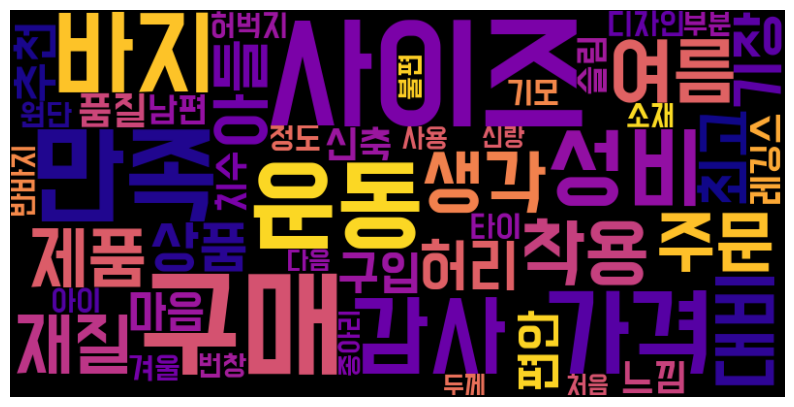

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "BMDOHYEON_ttf.ttf"

wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800,
    height=400,
    background_color='black',  # 배경색을 흰색으로 설정
    colormap='plasma',  # 색상 맵 지정
    max_words=50  # 표시할 최대 단어 수
)

# 판매량 높은 명사 빈도를 이용하여 워드클라우드 생성
# 한글 폰트를 지정한 후, wordcloud에 빈도 정보를 전달합니다
wordcloud.generate_from_frequencies(frequencies=noun_counts_high)

# 워드클라우드를 표시
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_high = tfidf_vectorizer.fit_transform(high_words)
X_low = tfidf_vectorizer.transform(low_words)

# 라벨 데이터 생성
y_high = np.ones(X_high.shape[0])
y_low = np.zeros(X_low.shape[0])

# 합치기
X = np.vstack((X_high.toarray(), X_low.toarray()))
y = np.concatenate((y_high, y_low))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5626191643514735
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.56      9153
         1.0       0.56      0.58      0.57      9204

    accuracy                           0.56     18357
   macro avg       0.56      0.56      0.56     18357
weighted avg       0.56      0.56      0.56     18357



C:\Users\LG\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# 리스트의 텍스트들을 하나의 문자열로 결합
combined_text = ' '.join(combined_text)

# TF-IDF 벡터화를 위한 객체 생성
tfidf_vectorizer = TfidfVectorizer()

# 학습 데이터에 대해 TF-IDF 적용
X_tfidf = tfidf_vectorizer.fit_transform([combined_text])  # combined_text를 리스트로 감싸줌

# 데이터 분할
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 모델 학습
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)

# 예측
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# 성능 평가
print("Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

# 성능 평가
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred))

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [118]:


# 단어 빈도를 기반으로 특징 벡터 생성
X = []
y = []

# 라벨이 1인 경우 (판매량 높음)
for word, count in word_counts.items():
    X.append(count)
    y.append(1)

# 라벨이 0인 경우 (판매량 낮음)
for word, count in word_counts1.items():
    X.append(count)
    y.append(0)

# 배열로 변환
X = np.array(X).reshape(-1, 1)
y = np.array(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 성능 평가
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49344978165938863
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65       453
           1       0.48      0.03      0.05       463

    accuracy                           0.49       916
   macro avg       0.49      0.50      0.35       916
weighted avg       0.49      0.49      0.35       916

Training Accuracy: 0.5128345166575642
Testing Accuracy: 0.49344978165938863
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65       453
           1       0.48      0.03      0.05       463

    accuracy                           0.49       916
   macro avg       0.49      0.50      0.35       916
weighted avg       0.49      0.49      0.35       916



In [117]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from keras.layers import RepeatVector

# Tokenizer를 사용하여 단어를 숫자로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(high_words)
tokenizer.fit_on_texts(low_words)

# 텍스트를 숫자 시퀀스로 변환
X_high = tokenizer.texts_to_sequences(high_words)
X_low = tokenizer.texts_to_sequences(low_words)

# 레이블 데이터 생성
y_high = [1] * len(X_high)
y_low = [0] * len(X_low)

# 시퀀스 길이를 맞춰줌
max_len = 100  # 예시로 임의의 시퀀스 길이 설정
X_high = pad_sequences(X_high, maxlen=max_len)
X_low = pad_sequences(X_low, maxlen=max_len)

# LSTM 모델 정의
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# 10개의 은닉층과 규제 및 Dropout 추가
for i in range(10):
    # 규제 및 Dropout을 번갈아 가면서 추가
    if i % 2 == 0:
        model.add(LSTM(units=128, 
                       kernel_regularizer=l1(0.01),  # L1 규제
                       recurrent_regularizer=l2(0.01),  # L2 규제
                       activity_regularizer=l1_l2(l1=0.01, l2=0.01)  # L1_L2 규제
                      ))
    else:
        model.add(RepeatVector(max_len))
        model.add(LSTM(units=128, return_sequences=True))
        model.add(Dropout(0.5))  # Dropout 추가

# Flatten을 추가하여 1D로 변환
model.add(Flatten())

# 출력층
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 (두 데이터셋을 합쳐서 사용)
model.fit(np.vstack((X_high, X_low)), np.hstack((y_high, y_low)), epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
2295/2295 [==============================] - 1713s 734ms/step - loss: 3.4562 - accuracy: 0.6272 - val_loss: 1.3553 - val_accuracy: 0.0000e+00
Epoch 2/5
 554/2295 [======>.......................] - ETA: 19:46 - loss: 1.0692 - accuracy: 0.6253

KeyboardInterrupt: 